# Práctica 3
## Población de México

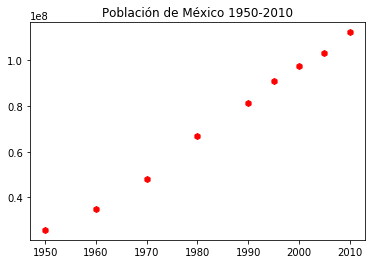

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
np.set_printoptions(precision=2)
objetivos = {1940: 19653552, 1995: 91158290, 2015:119938473 }

datos = np.loadtxt('poblacion_mex_1950-2010.txt', skiprows=1)
x = datos[:,0]
y = datos[:,1]
plt.plot(x,y,'rh')
plt.title("Población de México 1950-2010")
plt.show()

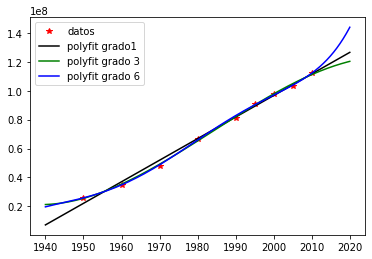

La población en 1940 era 19653552
--------------------------------------------------
n=1
aproximación=7071905.872000694
error relativo=0.6401716151868785
--------------------------------------------------
n=3
aproximación=21193641.395507812
error relativo=0.07836188570431506
--------------------------------------------------
n=6
aproximación=19589248.0
error relativo=0.003271876757951947
--------------------------------------------------
La población en 1995 era 91158290
--------------------------------------------------
n=1
aproximación=89246077.23040009
error relativo=0.020976838964398243
--------------------------------------------------
n=3
aproximación=90146969.30908203
error relativo=0.011094116518837384
--------------------------------------------------
n=6
aproximación=90218352.0
error relativo=0.010311053443411456
--------------------------------------------------
La población en 2020 será 119938473
--------------------------------------------------
n=1
aproximación=119127594.

In [19]:
def relative_error(approx, target):
    return np.abs(approx - target)/np.abs(target)

def get_x_values(lim_inf, lim_sup, n_points=10000):
    return np.linspace(lim_inf,lim_sup, n_points)

def get_coefficients_for_grade(x,y,n):
    return np.polyfit(x, y, n)

def get_y_values(coefficients, x_values):
    return np.polyval(coefficients, x_values)

def calculate_approximation_and_error(n, year):
    coeffs = get_coefficients_for_grade(x, y, n)
    approx = get_y_values(coeffs, year)
    err = relative_error(approx, objetivos[year])
    return approx, err

x_values = get_x_values(1940,2020)
polynomial_grades = np.array([1,3,6])
dict_grade_coeff = {}
for n in polynomial_grades:
    dict_grade_coeff[n] = []
    coefs = get_coefficients_for_grade(x,y,n)
    dict_grade_coeff[n].append(coefs)
    y_vals = get_y_values(coefs, x_values)
    dict_grade_coeff[n].append(y_vals)

vals_1 = calculate_approximation_and_error(1, 1940)
vals_3 = calculate_approximation_and_error(3, 1940)
vals_6 = calculate_approximation_and_error(6, 1940)

vals_1_1995 = calculate_approximation_and_error(1, 1995)
vals_3_1995 = calculate_approximation_and_error(3, 1995)
vals_6_1995 = calculate_approximation_and_error(6, 1995)

vals_1_2020 = calculate_approximation_and_error(1, 2015)
vals_3_2020 = calculate_approximation_and_error(3, 2015)
vals_6_2020 = calculate_approximation_and_error(6, 2015)

plt.plot(x,y,'r*',
         x_values, dict_grade_coeff[1][1], 'k-',
         x_values, dict_grade_coeff[3][1], 'g-',
         x_values, dict_grade_coeff[6][1], 'b-'
)
plt.legend(("datos","polyfit grado1", "polyfit grado 3", "polyfit grado 6"),loc="best")
plt.show()

print("La población en 1940 era {}\n{}".format(objetivos[1940], "-"*50))
print("n={}\naproximación={}\nerror relativo={}\n{}".format(1, vals_1[0], vals_1[1], "-"*50))
print("n={}\naproximación={}\nerror relativo={}\n{}".format(3, vals_3[0], vals_3[1], "-"*50))
print("n={}\naproximación={}\nerror relativo={}\n{}".format(6, vals_6[0], vals_6[1], "-"*50))
print("="*50)
print("La población en 1995 era {}\n{}".format(objetivos[1995], "-"*50))
print("n={}\naproximación={}\nerror relativo={}\n{}".format(1, vals_1_1995[0], vals_1_1995[1], "-"*50))
print("n={}\naproximación={}\nerror relativo={}\n{}".format(3, vals_3_1995[0], vals_3_1995[1], "-"*50))
print("n={}\naproximación={}\nerror relativo={}\n{}".format(6, vals_6_1995[0], vals_6_1995[1], "-"*50))
print("="*50)
print("La población en 2020 será {}\n{}".format(objetivos[2015], "-"*50))
print("n={}\naproximación={}\nerror relativo={}\n{}".format(1, vals_1_2020[0], vals_1_2020[1], "-"*50))
print("n={}\naproximación={}\nerror relativo={}\n{}".format(3, vals_3_2020[0], vals_3_2020[1], "-"*50))
print("n={}\naproximación={}\nerror relativo={}\n{}".format(6, vals_6_2020[0], vals_6_2020[1], "-"*50))


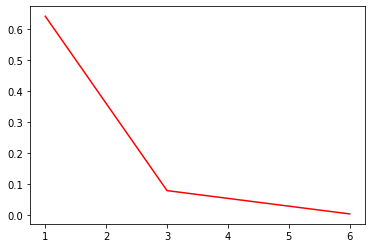

In [20]:
plt.plot([1,3,6],[vals_1[1], vals_3[1], vals_6[1]],'r-' )
plt.show()

### Con splines cúbicos

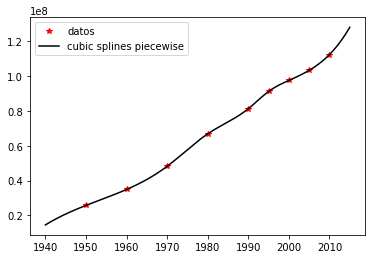

In [25]:
from scipy.interpolate import interp1d
x_values = get_x_values(1940,2015)
piecewise_spline = interp1d(x, y, kind = 'cubic',fill_value="extrapolate") #spline piecewise 
yeval_cubic_splines = piecewise_spline(x_values)
plt.plot(x, y, 'r*',x_values, yeval_cubic_splines, 'k-')
plt.legend(['datos','cubic splines piecewise'], loc='best')
plt.show()

## Resultados de Splines Cúbicos

In [27]:
est_1940 = piecewise_spline(1940)
print("1940")
print("Población real:", objetivos[1940])
print("Estimación de splines cúbicos para 1940", est_1940)
print("Error relativo para estimación de 1940", relative_error(est_1940, objetivos[1940]))
print("*"*50)
est_1995 = piecewise_spline(1995)
print("1995")
print("Población real:", objetivos[1995])
print("Estimación de splines cúbicos para 1995", est_1995)
print("Error relativo para estimación de 1995", relative_error(est_1995, objetivos[1995]))
print("*"*50)
est_2015 = piecewise_spline(2015)
print("2015")
print("Población real:", objetivos[2015])
print("Estimación de splines cúbicos para 2015", est_2015)
print("Error relativo para estimación de 2015", relative_error(est_2015, objetivos[2015]))
print("*"*50)



1940
Población real: 19653552
Estimación de splines cúbicos para 1940 14587110.417094031
Error relativo para estimación de 1940 0.2577875786985461
**************************************************
1995
Población real: 91158290
Estimación de splines cúbicos para 1995 91158290.0
Error relativo para estimación de 1995 0.0
**************************************************
2015
Población real: 119938473
Estimación de splines cúbicos para 2015 127981765.88760683
Error relativo para estimación de 2015 0.06706182500428223
**************************************************
